**Project goal**: to analyze clients' behavior of telecom operator Megaline and determine which prepaid plan brings in more revenue: Surf or Ultimate.

**Description of the data**

The datasets contain the following fields:

The users' table (data on users):
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)
- `city` — user's city of residence
- `plan` — calling plan name

The calls table (data on calls):
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — the identifier of the user making the call

The messages table (data on texts):
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text

The internet table (data on web sessions):
- `id` — unique session identifier
- `mb_used` — the volume of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier

The plans table (data on the plans):
- `plan_name` — calling plan name
- `usd_monthly_fee` — monthly charge in US dollars
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

**Description of the plans:**

Note: Megaline rounds seconds up to minutes and megabytes to gigabytes. Each call is rounded up for calls: even if it lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. For example, if someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

*Surf:*

Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: $10

*Ultimate:*

Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: $7

**Step 1. Open the data file and study the general information**

- Loading all the libraries
- Load the data files into a DataFrames
- Get info on all the datasets
- Count the percentage of missing values
- Getting the info about data types
- Conclusions and further steps

**Step 2. Prepare the data**

- Convert the data to the necessary types
- Check that all data types are fixed
- Check data for 0s

For each user, find:

- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user 

**Step 3. Analyze the data**

- Find the minutes, texts, and volume of data the users of each plan require per month
- Calculate the mean, dispersion, and standard deviation
- Plot histograms
- Describe the distributions


**Step 4. Test the hypotheses**

We will test the following hypotheses:

- The average revenue from users of Ultimate and Surf calling plans differs
- The average revenue from users in the NY-NJ area is different from that of the users from other regions

**Step 5. Write an overall conclusion**

## Open the data file and study the general information

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [2]:
# Load data files into DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
# Let's see how many rows and columns our datasets have

calls.shape
internet.shape
messages.shape
plans.shape
users.shape

print('Number of rows and columns in calls:', calls.shape)
print('Number of rows and columns in internet:', internet.shape)
print('Number of rows and columns in messages:', messages.shape)
print('Number of rows and columns in plans:', plans.shape)
print('Number of rows and columns in users:', users.shape)

Number of rows and columns in calls: (137735, 4)
Number of rows and columns in internet: (104825, 4)
Number of rows and columns in messages: (76051, 3)
Number of rows and columns in plans: (2, 8)
Number of rows and columns in users: (500, 8)


In [4]:
# First 10 rows of each dataset
# First 10 rows of calls

calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [5]:
# First 10 rows of internet

internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [6]:
# First 10 rows of messages

messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [7]:
# First 10 rows of users

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [8]:
# All rows of plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
# Get info on data
# Info on calls

calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Info on internet

internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
# Info on messages

messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
# Info on plans

plans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
# Info on users

users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
# Count the percentage of missing values in users

percent_missing = users.isnull().sum() * 100 / len(users)
missing_value_data = pd.DataFrame({'columns': list(users.columns),
                                   'percent_missing': list(percent_missing)})
print(missing_value_data)

      columns  percent_missing
0     user_id              0.0
1  first_name              0.0
2   last_name              0.0
3         age              0.0
4        city              0.0
5    reg_date              0.0
6        plan              0.0
7  churn_date             93.2


There are missing values in `churn_date`(93%). It can mean that the calling plan was used when this data was retrieved. We do not need this column in further research, so we can leave it as it is. 

In [15]:
# Getting info about data types
# Data types of calls

calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

We need to convert the type of `call_date` from object to datetime.

In [16]:
# Data types of internet

internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

We need to convert the type of `session_date` from object to datetime

In [17]:
# Data types of messages

messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

We need to convert the type of `message_date` from object to datetime

In [18]:
# Data types of users

users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

We need to convert the type of `reg_date` and `churn_date` from object to datetime

### Conclusions and further steps

Most of the columns of our datasets look normal, but part of the data should be treated to make it more suitable for the required analysis.

- There are wrong types of data in datasets. We need to convert the type of `call_date` in calls, `session_date` in internet, `message_date` in messages, `reg_date` and `churn_date` in users - from object to DateTime.

## Prepare the data

In [19]:
# Convert the data to the necessary types
# Fix data types

calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [20]:
# Check all data types are fixed

calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [21]:
internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [22]:
messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [23]:
users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

In [24]:
# Let's find and eliminate errors in the data
# Check calls for 0s

for i in calls:
    print(i, len(calls[calls[i]==0]))

id 0
user_id 0
call_date 0
duration 26834


In [25]:
# Count the percentage of 0s in calls

duration_0 = calls[calls['duration']==0]['duration'].count()
percent_0 = duration_0 * 100 / len(calls)

percent_0

19.48233927469416

In [26]:
duration_0

26834

Many calls (more than 19%) have a duration of 0.0 minutes. We can leave them because their presence will not influence the revenue.

For each user, we will find:

- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [27]:
# Let's find the number of calls made and minutes used per month
# Firstly check that 'call_date' has data of one year

print(calls['call_date'].max())
print('-------------------------')
print(calls['call_date'].min())

2018-12-31 00:00:00
-------------------------
2018-01-15 00:00:00


In [28]:
# Extract months from 'call_date' in calls

calls['month']=pd.to_datetime(calls['call_date']).dt.month
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [29]:
# Calculate number of calls made per month

calls_group = calls.groupby(['user_id','month']).count()['duration']
calls_group = calls_group.reset_index(name='calls')
calls_group.head()

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [30]:
# Calculate minutes used per month
# Minutes for each call should be rounded up to the next whole number

calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [31]:
# Calculate number of calls per month

minutes_group = calls.groupby(['user_id','month'])['duration'].sum()
minutes_group = minutes_group.reset_index(name='minutes')
minutes_group.head()

,user_id,month,minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [32]:
# Let's find the number of text messages sent per month
# First check that 'message_date' has data of one year

print(messages['message_date'].max())
print('-------------------------')
print(messages['message_date'].min())

2018-12-31 00:00:00
-------------------------
2018-01-15 00:00:00


In [33]:
# Let's extract months from 'message_date' in messages

messages['month']=pd.to_datetime(messages['message_date']).dt.month
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [34]:
# Calculate number of text messages sent per month

messages_group = messages.groupby(['user_id','month'])['id'].count()
messages_group = messages_group.reset_index(name='messages')
messages_group.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [35]:
# Let's find the volume of data per month
# Firstly check that 'session_date' has data of one year

print(internet['session_date'].max())
print('-------------------------')
print(internet['session_date'].min())

2018-12-31 00:00:00
-------------------------
2018-01-15 00:00:00


In [36]:
# Let's extract months from 'session_date' in internet

internet['month']=pd.to_datetime(internet['session_date']).dt.month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [37]:
# Calculate volume of data per month

internet_group = internet.groupby(['user_id','month'])['mb_used'].sum()
internet_group = internet_group.reset_index(name='internet_volume')
internet_group.head()

,user_id,month,internet_volume
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [38]:
#Now we need to round each amount of megabytes up to the next thousand

internet_group['internet_gb'] = internet_group['internet_volume'] / 1000
internet_group.head()

,user_id,month,internet_volume,internet_gb
0,1000,12,1901.47,1.90147
1,1001,8,6919.15,6.91915
2,1001,9,13314.82,13.31482
3,1001,10,22330.49,22.33049
4,1001,11,18504.30,18.50430


In [39]:
internet_group['internet_gb'] = internet_group['internet_gb'].apply(np.ceil)
internet_group.head()

,user_id,month,internet_volume,internet_gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,23.0
4,1001,11,18504.30,19.0


In [40]:
internet_group['internet_gb'] = internet_group['internet_gb'] * 1000
internet_group.head()

,user_id,month,internet_volume,internet_gb
0,1000,12,1901.47,2000.0
1,1001,8,6919.15,7000.0
2,1001,9,13314.82,14000.0
3,1001,10,22330.49,23000.0
4,1001,11,18504.30,19000.0


In [41]:
internet_group['internet_volume'] = internet_group['internet_gb'] 
internet_group.drop('internet_gb', axis=1, inplace=True)
internet_group.head()

,user_id,month,internet_volume
0,1000,12,2000.0
1,1001,8,7000.0
2,1001,9,14000.0
3,1001,10,23000.0
4,1001,11,19000.0


In [42]:
minutes_group['month'].unique()

array([12,  8,  9, 10, 11,  5,  6,  7,  3,  4,  1,  2])

In [43]:
# Let's find the monthly revenue from each user 
# Merge the data

total_1= pd.merge(left = internet_group, 
                right = calls_group, how='outer',on=['user_id', 'month']).fillna(0)
total_2=pd.merge(left = total_1, 
                right = messages_group, how='outer',on=['user_id', 'month']).fillna(0)
total_3=pd.merge(left = total_2, 
                right = minutes_group, how='outer',on=['user_id', 'month']).fillna(0)

We found the minutes, texts, and volume of data the users of each plan require per month. 

In [44]:
# Merge plans and cities (we will need this column in future investigation) to our new table

total_4=pd.merge(left = total_3, 
                right = users, how='inner',on=['user_id']).fillna(0)
#total_4.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date'], axis=1, inplace=True)
total_4 = total_4[['user_id','city', 'plan', 'month', 'internet_volume', 'calls', 'messages', 'minutes']]
total_4.head()

,user_id,city,plan,month,internet_volume,calls,messages,minutes
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,12,2000.0,16.0,11.0,124.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8,7000.0,27.0,30.0,182.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,9,14000.0,49.0,44.0,315.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,10,23000.0,65.0,53.0,393.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,11,19000.0,64.0,36.0,426.0


## Analyze the data

We will describe the customers' behavior. We find the minutes, texts, and volume of data the users of each plan require per month, calculate the mean, dispersion, and standard deviation, plot histograms and describe the distributions.

In [45]:
# Let's find minutes the users of each plan require per month

total_surf = total_4[total_4['plan']=='surf']
total_ultimate = total_4[total_4['plan']=='ultimate']

minutes_by_months_surf = total_surf.groupby(['month'])['minutes'].sum()
minutes_by_months_ultimate = total_ultimate.groupby(['month'])['minutes'].sum()

minutes_by_months_surf/sum(minutes_by_months_surf)

month
1     0.000602
2     0.003963
3     0.011254
4     0.026062
5     0.045621
6     0.062032
7     0.080733
8     0.098511
9     0.119154
10    0.151012
11    0.177635
12    0.223421
Name: minutes, dtype: float64

In [46]:
minutes_by_months_ultimate/sum(minutes_by_months_ultimate)

month
1     0.002497
2     0.009105
3     0.011780
4     0.022825
5     0.038013
6     0.056256
7     0.081301
8     0.096546
9     0.121404
10    0.154160
11    0.182432
12    0.223681
Name: minutes, dtype: float64

We see that the number of minutes used is growing every month. It may be because the number of users has grown every month.

In [47]:
# Let's see the destribution of users by months

users_by_month = total_4.groupby('month').count()['user_id']
users_by_month/sum(users_by_month)

month
1     0.002617
2     0.006978
3     0.015264
4     0.030964
5     0.046228
6     0.062800
7     0.078500
8     0.101614
9     0.122111
10    0.149586
11    0.178805
12    0.204536
Name: user_id, dtype: float64

Yes, the minutes used and the number of users grow approximately, in the same way, every month.

In [48]:
# Let's calculate the mean, dispersion, and standard deviation, plot histograms and describe the distributions
# Create a function to see all the metrics

def function(parameter):
    print('The histogram of surf plan: {}'.format(parameter))
    total_surf[parameter].hist(bins=100)
    plt.show()
    if total_surf[parameter].mean()>total_surf[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on surf plan: {}'.format(parameter))
    print(total_surf[parameter].describe())
    print("Variance for surf plan:", np.std(total_surf[parameter])**2)
    sigma_surf = np.sqrt(np.std(total_surf[parameter]))

    
    print('The histogram of ultimate plan: {}'.format(parameter))
    total_ultimate[parameter].hist(bins=100)
    plt.show()
    if total_ultimate[parameter].mean()>total_ultimate[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on ultimate plan: {}'.format(parameter))
    print(total_ultimate[parameter].describe())
    print("Variance for ultimate plan:", np.std(total_ultimate[parameter])**2)
   

The histogram of surf plan: minutes


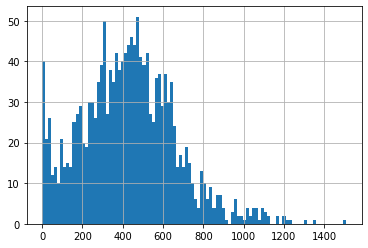

The distribution is skewed to the right
---------------------------------------
Statistics on surf plan: minutes
count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: minutes, dtype: float64
Variance for surf plan: 54933.334591317485
The histogram of ultimate plan: minutes


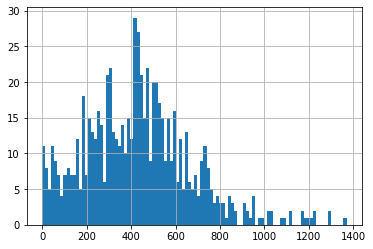

The distribution is skewed to the right
---------------------------------------
Statistics on ultimate plan: minutes
count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: minutes, dtype: float64
Variance for ultimate plan: 57764.12527777777


In [49]:
# Apply function to minutes

function('minutes')

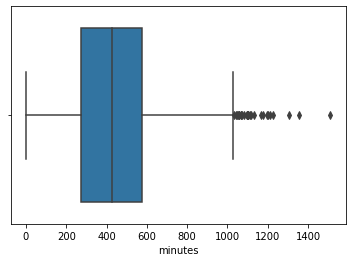

In [50]:
sns.boxplot(x=total_surf['minutes'])
plt.show()

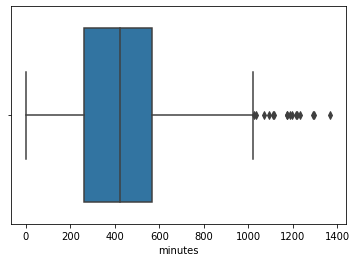

In [51]:
sns.boxplot(x=total_ultimate['minutes'])
plt.show()

Most surf plan users spend between 272 and 576 minutes per month.
Most ultimate plan users spend between 260 and 565 minutes per month.
We can see that regardless of the plan, most users talk on the phone for about the same time, even though Ultimate plan users can spend up to 3,000 minutes per month at no additional cost. 

In [52]:
# Let's find texts the users of each plan require per month

messages_by_months_surf = total_surf.groupby(['month'])['messages'].sum()
messages_by_months_ultimate = total_ultimate.groupby(['month'])['messages'].sum()

messages_by_months_surf/sum(messages_by_months_surf)

month
1     0.000428
2     0.002203
3     0.007161
4     0.017750
5     0.037724
6     0.050067
7     0.066736
8     0.095116
9     0.121761
10    0.163627
11    0.186987
12    0.250439
Name: messages, dtype: float64

In [53]:
messages_by_months_ultimate/sum(messages_by_months_ultimate)

month
1     0.002293
2     0.005585
3     0.008988
4     0.017125
5     0.034434
6     0.051004
7     0.071643
8     0.101047
9     0.120539
10    0.154640
11    0.181344
12    0.251359
Name: messages, dtype: float64

In [54]:
# Let's see the destribution of users by months

users_by_month = total_4.groupby('month').count()['user_id']
users_by_month/sum(users_by_month)

month
1     0.002617
2     0.006978
3     0.015264
4     0.030964
5     0.046228
6     0.062800
7     0.078500
8     0.101614
9     0.122111
10    0.149586
11    0.178805
12    0.204536
Name: user_id, dtype: float64

The messages and the number of users grow approximately, in the same way, every month.

The histogram of surf plan: messages


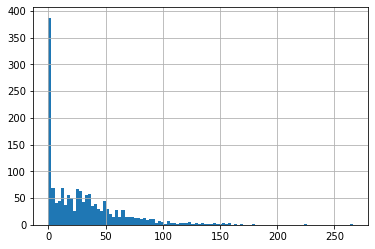

The distribution is skewed to the right
---------------------------------------
Statistics on surf plan: messages
count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages, dtype: float64
Variance for surf plan: 1126.008231726662
The histogram of ultimate plan: messages


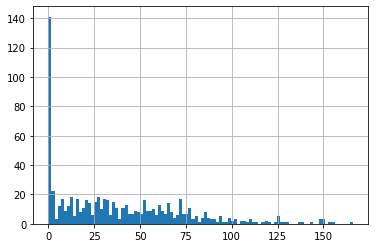

The distribution is skewed to the right
---------------------------------------
Statistics on ultimate plan: messages
count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: messages, dtype: float64
Variance for ultimate plan: 1207.0779147376543


In [55]:
# Let's calculate the mean, dispersion, and standard deviation, plot histograms and describe the distributions
# Apply function to messages

function('messages')

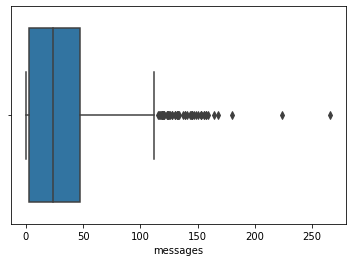

In [56]:
sns.boxplot(x=total_surf['messages'])
plt.show()

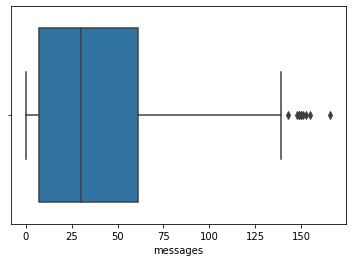

In [57]:
sns.boxplot(x=total_ultimate['messages'])
plt.show()

Most surf plan users write between 3 and 47 messages per month.
Most ultimate plan users write between 7 and 61 messages per month.
We can see that regardless of the plan, most users send about the same amount of messages per month, even though Ultimate plan users can send up to 1,000 minutes per month at no additional cost. We also see that many users of both plans do not use the messages at all. It may be because many people prefer to use Internet applications and messengers for text communication.

In [58]:
# Let's find volume of data the users of each plan require per month

internet_by_months_surf = total_surf.groupby(['month'])['internet_volume'].sum()
internet_by_months_ultimate = total_ultimate.groupby(['month'])['internet_volume'].sum()

internet_by_months_surf/sum(internet_by_months_surf)

month
1     0.000373
2     0.004254
3     0.011828
4     0.023172
5     0.041530
6     0.057052
7     0.078097
8     0.104291
9     0.123582
10    0.157164
11    0.177799
12    0.220858
Name: internet_volume, dtype: float64

In [59]:
internet_by_months_ultimate/sum(internet_by_months_ultimate)

month
1     0.002273
2     0.009641
3     0.017714
4     0.027120
5     0.038799
6     0.058316
7     0.077755
8     0.102289
9     0.118200
10    0.150259
11    0.174636
12    0.222997
Name: internet_volume, dtype: float64

In [60]:
# Let's see the destribution of users by months

users_by_month = total_4.groupby('month').count()['user_id']
users_by_month/sum(users_by_month)

month
1     0.002617
2     0.006978
3     0.015264
4     0.030964
5     0.046228
6     0.062800
7     0.078500
8     0.101614
9     0.122111
10    0.149586
11    0.178805
12    0.204536
Name: user_id, dtype: float64

The volume of data and the number of users grow approximately, in the same way, every month.

The histogram of surf plan: internet_volume


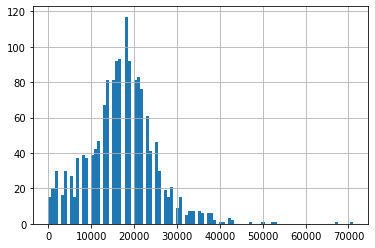

The distribution is skewed to the right
---------------------------------------
Statistics on surf plan: internet_volume
count     1573.000000
mean     17037.507947
std       8016.394899
min          0.000000
25%      12000.000000
50%      17000.000000
75%      21000.000000
max      71000.000000
Name: internet_volume, dtype: float64
Variance for surf plan: 64221733.6498097
The histogram of ultimate plan: internet_volume


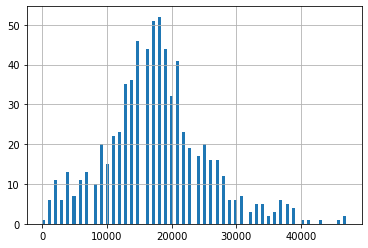

The distribution is skewed to the right
---------------------------------------
Statistics on ultimate plan: internet_volume
count      720.000000
mean     17719.444444
std       7865.288592
min          0.000000
25%      13000.000000
50%      17000.000000
75%      22000.000000
max      47000.000000
Name: internet_volume, dtype: float64
Variance for ultimate plan: 61776844.13580247


In [61]:
# Let's calculate the mean, dispersion, and standard deviation, plot histograms and describe the distributions
# Apply function to internet_volume

function('internet_volume')

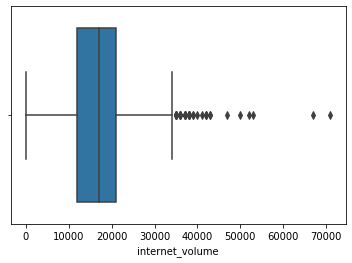

In [62]:
sns.boxplot(x=total_surf['internet_volume'])
plt.show()

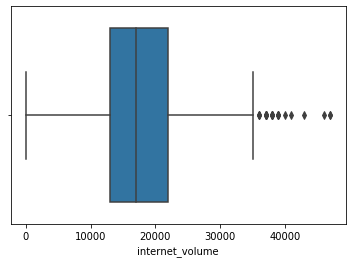

In [63]:
sns.boxplot(x=total_ultimate['internet_volume'])
plt.show()

Most surf plan users use between 12GB and 21GB per month.
Most ultimate plan users use between 13GB and 22GB per month.
We can see that most users use about the same volume of data per month regardless of the plan. Even though Ultimate plan users can send up to 30GB per month at no additional cost, users of the cheaper plan have to pay an extra fee every time they go over 15GB per month.

##  Test the hypotheses

At this step, we need to test the following hypotheses:

1. The average revenue from users of Ultimate and Surf calling plans differs
2. The average revenue from users in NY-NJ area is different from that of the users from other regions

In [64]:
# Let's create the function to find the average revenue from users of Ultimate and Surf

def cost(row):
    plan = row['plan']
    internet_volume=row['internet_volume']/1000
    messages=row['messages']
    minutes=row['minutes']
    
    
    if plan == 'surf':
        total_cost = 20 + max((minutes - 500), 0) * 0.03 + max((messages - 50), 0) * 0.03 + max((internet_volume - 15), 0) * 10
        
    else:
        total_cost = 70 + max((minutes - 3000), 0) * 0.01 + max((messages - 1000), 0) * 0.01 + max((internet_volume - 30), 0) * 7
     
    return total_cost

In [65]:
# Apply our function to every row of our data

total_4['total_cost']=total_4.apply(cost,axis=1)
total_4
total_4.head()

,user_id,city,plan,month,internet_volume,calls,messages,minutes,total_cost
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,12,2000.0,16.0,11.0,124.0,70.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8,7000.0,27.0,30.0,182.0,20.00
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,9,14000.0,49.0,44.0,315.0,20.00
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,10,23000.0,65.0,53.0,393.0,100.09
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,11,19000.0,64.0,36.0,426.0,60.00


We test the following hypotheses:

- H0 - The average revenue from users of Ultimate and Surf calling plans not differs
- H1 - The average revenue from users of Ultimate and Surf calling plans differs

In [66]:
total_surf = total_4[total_4['plan']=='surf']
total_ultimate = total_4[total_4['plan']=='ultimate']

st.levene(total_surf['total_cost'], total_ultimate['total_cost'], center='mean')
# the sample groups do not have equal variance, the test rejects, so we will use equal_var = False
# this allso makes sense here because its diffrent dataframes!

LeveneResult(statistic=595.0615969529043, pvalue=4.928392512556122e-117)

In [67]:
alpha = 0.05 # critical statistical significance level, 
# if the p-value is less than alpha, we reject the hypothesis
# null hypothesis is always that things we compare are equal. 

result1 = st.ttest_ind(
        total_surf['total_cost'], 
        total_ultimate['total_cost'], equal_var = False)

print('p-value: ', result1.pvalue)

if (result1.pvalue < alpha):
        print("We reject the null hypothesis") 
else:
        print("We can't reject the null hypothesis")
        
# general mean 
surf_mean = total_surf['total_cost'].mean() 
ultimate_mean = total_ultimate['total_cost'].mean() 
print('surf mean:', surf_mean) 
print('ultimate mean:', ultimate_mean)

# so we understand they are different, like we thought

p-value:  2.81373182813939e-09
We reject the null hypothesis
surf mean: 63.6116846789574
ultimate mean: 72.70277777777778


It means that we can reject that the average revenue from users of Ultimate and Surf calling plans does not differ. But, at the same time, we can't reject that the average revenue from users of Ultimate and Surf calling plans differs.

Now we test the following hypotheses:

- H1 - The average revenue from users in NY-NJ area is not different from that of the users from other regions
- H0 - The average revenue from users in NY-NJ area is different from that of the users from other regions

In [68]:
# Let's extract areas

city_city = []
city_state = []

for i in range(len(total_4)):
    city_splitted = total_4.loc[i, 'city'][:-4].split(', ')
    city_city.append(city_splitted[0])
    city_state.append(city_splitted[1])
    
total_4['city_city'] = city_city
total_4['state'] = city_state

total_4 = total_4[['user_id','state', 'plan', 'month', 'internet_volume', 'calls', 'messages', 'minutes', 'total_cost']]
total_4.head()

,user_id,state,plan,month,internet_volume,calls,messages,minutes,total_cost
0,1000,GA,ultimate,12,2000.0,16.0,11.0,124.0,70.00
1,1001,WA,surf,8,7000.0,27.0,30.0,182.0,20.00
2,1001,WA,surf,9,14000.0,49.0,44.0,315.0,20.00
3,1001,WA,surf,10,23000.0,65.0,53.0,393.0,100.09
4,1001,WA,surf,11,19000.0,64.0,36.0,426.0,60.00


In [69]:
# Extract users from NY-NJ areas

ny_nj_users = total_4[['NY-NJ' in st for st in total_4['state']]]
ny_nj_users.head()

,user_id,state,plan,month,internet_volume,calls,messages,minutes,total_cost
56,1014,NY-NJ-PA,surf,11,2000.0,28.0,9.0,163.0,20.00
57,1014,NY-NJ-PA,surf,12,8000.0,150.0,64.0,1114.0,38.84
75,1022,NY-NJ-PA,surf,5,5000.0,39.0,0.0,302.0,20.00
76,1022,NY-NJ-PA,surf,6,24000.0,76.0,0.0,490.0,110.00
77,1022,NY-NJ-PA,surf,7,10000.0,70.0,0.0,475.0,20.00


In [70]:
# Extract users from other areas

other_regions = total_4[['NY-NJ' not in st for st in total_4['state']]]
other_regions.head()

,user_id,state,plan,month,internet_volume,calls,messages,minutes,total_cost
0,1000,GA,ultimate,12,2000.0,16.0,11.0,124.0,70.00
1,1001,WA,surf,8,7000.0,27.0,30.0,182.0,20.00
2,1001,WA,surf,9,14000.0,49.0,44.0,315.0,20.00
3,1001,WA,surf,10,23000.0,65.0,53.0,393.0,100.09
4,1001,WA,surf,11,19000.0,64.0,36.0,426.0,60.00


In [71]:
st.levene(ny_nj_users['total_cost'], other_regions['total_cost' ], center='mean')
# the sample groups do have equal variance, the test fails rejects, so we will use equal_var = True,
# this also makes sense here because it's from the same dataframe, just from diffrent cities.

LeveneResult(statistic=2.562901780490318, pvalue=0.10953548966682868)

In [72]:
result2 = st.ttest_ind(
        ny_nj_users['total_cost'], 
        other_regions['total_cost'], equal_var = True)

print('p-value: ', result2.pvalue)

if (result2.pvalue < alpha):
        print("We reject the null hypothesis") 
else:
        print("We can't reject the null hypothesis") 

#general mean 
ny_nj_users_mean = ny_nj_users['total_cost'].mean() 
other_regions_mean = other_regions['total_cost'].mean() 
print('NT-NJ users mean:', ny_nj_users_mean) 
print('other regions mean:', other_regions_mean)

# so we understand they are diffrent, like we thought

p-value:  0.0996049232160297
We can't reject the null hypothesis
NT-NJ users mean: 62.72506631299734
other regions mean: 67.20241649269312


It means that we can't reject that the average revenue from users in the NY-NJ area is not different from that of the users from other regions. At the same time, we can't reject that the average revenue from users in the NY-NJ area is different from that of the users from other regions.

## Conclusion

The project goal was to analyze clients' behavior of telecom operator Megaline and determine which prepaid plan brings in more revenue: Surf or Ultimate.

Our investigation contained four steps:

1. Open the data file and study the general information
2. Prepare the data
3. Analyze the data
4. Test the hypotheses

**Step 1. Open the data file and study the general information**

What we did:

- Loaded all the libraries and data files
- Got info on all the datasets
- Count the percentage of missing values
- Got the info about data types

What we found out:

Most of the columns of our datasets look normal, but part of the data should be treated to make it more suitable for the required analysis.

- There are wrong types of data in datasets. We need to convert the type of `call_date` in calls, `session_date` in internet, `message_date` in messages, `reg_date` and `churn_date` in users - from object to DateTime.

**Step 2. Prepare the data**

What we did:

- Converted the data to the necessary types
- Checked that all data types are fixed
- Checked data for 0s

For each user, we found:

- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user 

**Step 3. Analyze the data**

- We found the minutes, texts, and volume of data the users of each plan require per month
- Calculated the mean, dispersion, and standard deviation
- Plotted histograms
- Described the distributions


**Step 4. Test the hypotheses**

We tested the following hypotheses:

- The average revenue from users of Ultimate and Surf calling plans differs
- The average revenue from users in the NY-NJ area is different from that of the users from other regions

What we figured out:

- We can reject that the average revenue from Ultimate and Surf calling plans users does not differ. At the same time, we can't reject than the average revenue from users of Ultimate and Surf calling plans differs.
- We can't reject that the average revenue from users in the NY-NJ area is not different from that of the users from other regions. At the same time, we can't reject that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.